## **BI LINGUAL HANDWRITTEN INDIAN LANGUAGE TRANSLATION**

In [ ]:
# Import libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import easyocr

In [ ]:
photo="/content/a.jpg"

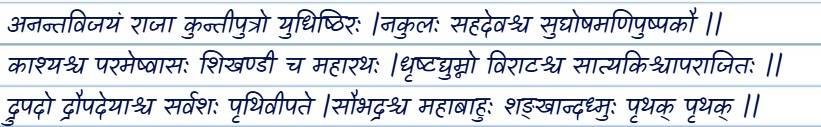

In [ ]:
import PIL
from PIL import ImageDraw
im=PIL.Image.open(photo)
im

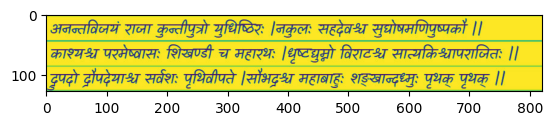

In [ ]:
from matplotlib import pyplot as plt
# load raw image
img = cv2.imread(photo,0)
# display raw image
plt.imshow(img)
plt.show()

In [ ]:
def sharpen_image(im):
  kernel = np.ones((3,3),np.float32)/90
  im = cv2.filter2D(im,-1,kernel)
  return im

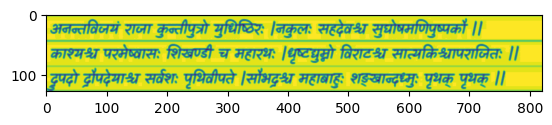

In [ ]:
img = sharpen_image(img)
# display sharpened image
plt.imshow(img)
plt.show()

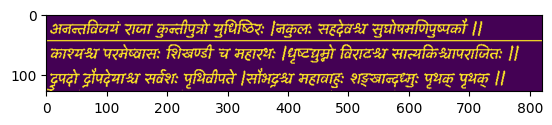

In [ ]:
# apply image thresholding
img_thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# invert the image, 255 is the maximum value
img_thresh = 255 - img_thresh
# display image
plt.imshow(img_thresh)
plt.show()


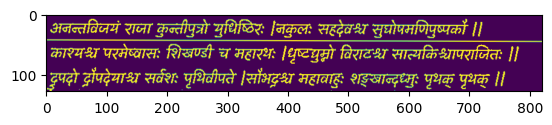

In [ ]:
def align_text(im):
  coords = np.column_stack(np.where(img_thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  h,w = img.shape
  center = (w // 2, h // 2)

  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img_thresh, M, (w, h),
            flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
  return rotated
# align image text
img = align_text(img)
# display rotated and aligned image
plt.imshow(img)
plt.show()

In [ ]:
reader =easyocr.Reader(['hi'])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
bounds=reader.readtext(photo,add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='')
bounds

[([[0, 0],
   [np.int32(190), 0],
   [np.int32(190), np.int32(50)],
   [0, np.int32(50)]],
  'अनन्तविजयं राजा =',
  np.float64(0.5305423841632992)),
 ([[np.int32(158), 0],
   [np.int32(738), 0],
   [np.int32(738), np.int32(65)],
   [np.int32(158), np.int32(65)]],
  'ना कुन्तीपुत्रो युधिष्ठिरः /नकुलः सहदेवश्च सुघोषमणिपुष्पकौ |',
  np.float64(0.48482252073190923)),
 ([[0, np.int32(35)],
   [np.int32(417), np.int32(35)],
   [np.int32(417), np.int32(94)],
   [0, np.int32(94)]],
  'काश्यश्च परमेष्वासः शिखण्डी च महारथः |धृ',
  np.float64(0.5842531633718874)),
 ([[np.int32(378), np.int32(31)],
   [np.int32(775), np.int32(31)],
   [np.int32(775), np.int32(104)],
   [np.int32(378), np.int32(104)]],
  'थृष्टयुम्नो विराटश्च सात्यकिश्चापराजितः /',
  np.float64(0.42764836796397043)),
 ([[np.int32(38), np.int32(64)],
   [np.int32(758), np.int32(64)],
   [np.int32(758), 127],
   [np.int32(38), 127]],
  'ो द्रौपदेयाश्च सर्वशः पृथिवीपते |सौभद्रश्च महाबाहुः शङ्खान्दध्मुः पृथक् पृथक् |',
  np.float64(0.2

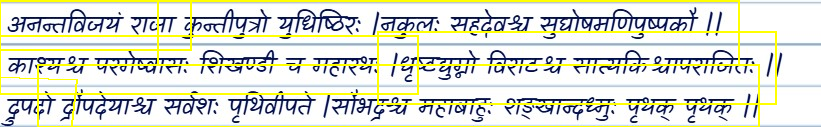

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image

draw_boxes(im, bounds)

In [ ]:
text_list=reader.readtext(photo,add_margin=0.55,width_ths=0.7,link_threshold=0.8,decoder='beamsearch',blocklist='',)
# Extract only the text from text_list
text_only = [item[1] for item in text_list]

print(text_only)

['अनन्तविजयं राजा =', 'ना कुन्तीपुत्रो युधिष्ठिरः /नकुलः सहदेवश्च सुघोषमणिपुष्पकौ |', 'काश्यश्च परमेष्वासः शिखण्डी च महारथः |धृ', 'थृष्टयुम्नो विराटश्च सात्यकिश्चापराजितः /', 'ो द्रौपदेयाश्च सर्वशः पृथिवीपते |सौभद्रश्च महाबाहुः शङ्खान्दध्मुः पृथक् पृथक् |', 'द्रुपदो द्र']


In [ ]:
text_comb=' '.join(text_only)
print(text_comb)

अनन्तविजयं राजा = ना कुन्तीपुत्रो युधिष्ठिरः /नकुलः सहदेवश्च सुघोषमणिपुष्पकौ | काश्यश्च परमेष्वासः शिखण्डी च महारथः |धृ थृष्टयुम्नो विराटश्च सात्यकिश्चापराजितः / ो द्रौपदेयाश्च सर्वशः पृथिवीपते |सौभद्रश्च महाबाहुः शङ्खान्दध्मुः पृथक् पृथक् | द्रुपदो द्र


In [ ]:
def calculate_exact_match_accuracy(extracted_texts, ground_truths):
    correct_matches = 0
    for extracted, ground_truth in zip(extracted_texts, ground_truths):
        if extracted.strip() == ground_truth.strip():
            correct_matches += 1

    return correct_matches / len(ground_truths)

# Example
extracted_texts = ["योगः कर्मसु कौशलम्", "धर्मक्षेत्रे कुरुक्षेत्रे"]
ground_truths = ["योगः कर्मसु कौशलम्", "धर्मक्षेत्रे कुरुक्षेत्रे"]
accuracy = calculate_exact_match_accuracy(extracted_texts, ground_truths)

print("Exact Match Accuracy:", accuracy)

Exact Match Accuracy: 1.0


In [ ]:
from google.colab import files
import pandas as pd

# Upload a CSV file from the local system
uploaded = files.upload()

# Load the uploaded file into a Pandas DataFrame
# Replace "Gita-data.csv" with the actual name of your uploaded file
df = pd.read_csv('Gita-data.csv')
print("Preview of the dataset:")
print(df.head())


Saving Gita-data.csv to Gita-data.csv
Preview of the dataset:
      id                                           Sanskrit  \
0  c:1v1  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  c:1v2  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  c:1v3  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3  c:1v4             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    
4  c:1v5             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    

                                             English  
0  Dhritarashtra said: O Sanjay, after gathering ...  
1  Sanjay said: On observing the Pandava army sta...  
2  Duryodhan said: Respected teacher! Behold the ...  
3  Behold in their ranks are many powerful warrio...  
4  Behold in their ranks are many powerful warrio...  


In [ ]:
# Check for missing values in the dataset and display the count for each column
print("Missing values in the dataset:")
print(df.isnull().sum())

# Display basic statistical information about numerical columns in the dataset
print("\nBasic statistical summary of the dataset:")
print(df.describe())

# Data Preprocessing Steps
# 1. Drop rows with missing values in the 'Sanskrit' and 'English' columns (if these columns exist)
df = df.dropna(subset=['Sanskrit', 'English'])

# 2. Remove duplicate rows from the dataset
df = df.drop_duplicates()

# 3. Convert text in 'Sanskrit' and 'English' columns to lowercase for uniformity
df['sanskrit'] = df['Sanskrit'].str.lower()
df['english'] = df['English'].str.lower()

Missing values in the dataset:
id          0
Sanskrit    0
English     0
dtype: int64

Basic statistical summary of the dataset:
             id                                           Sanskrit  \
count       700                                                700   
unique      700                                                639   
top     c:18v78  अमानित्वमदम्भित्वमहिंसा क्षान्तिरार्जवम् |आचार...   
freq          1                                                  5   

                                                  English  
count                                                 700  
unique                                                639  
top     Humbleness; freedom from hypocrisy; non-violen...  
freq                                                    5  


In [ ]:
# Display a preview of the cleaned dataset
print("Cleaned dataset preview:")
print(df.head())

Cleaned dataset preview:
      id                                           Sanskrit  \
0  c:1v1  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  c:1v2  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  c:1v3  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3  c:1v4             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    
4  c:1v5             अत्र शूरा महेष्वासा भीमार्जुनसमा युधि    

                                             English  \
0  Dhritarashtra said: O Sanjay, after gathering ...   
1  Sanjay said: On observing the Pandava army sta...   
2  Duryodhan said: Respected teacher! Behold the ...   
3  Behold in their ranks are many powerful warrio...   
4  Behold in their ranks are many powerful warrio...   

                                            sanskrit  \
0  धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समव...   
1  सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर...   
2  पश्यैतां पाण्डुपुत्राणामाचार्य महतीं चमूम् ।व्...   
3             अत्र शूरा महेष्वासा भ

In [ ]:
# Create a one-dimensional row matrix from the dataset
matrix = np.array(df)

# Display the resulting matrix
print("One-dimensional row matrix:")
print(matrix)


One-dimensional row matrix:
[['c:1v1'
  'धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः |मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय ||'
  'Dhritarashtra said: O Sanjay, after gathering on the holy field of Kurukshetra, and desiring to fight, what did my sons and the sons of Pandu do?'
  'धृतराष्ट्र उवाच |धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः |मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय ||'
  'dhritarashtra said: o sanjay, after gathering on the holy field of kurukshetra, and desiring to fight, what did my sons and the sons of pandu do?']
 ['c:1v2'
  'सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर्योधनस्तदा ।आचार्यमुपसङ्गम्य राजा वचनमब्रवीत् ।। ।।'
  'Sanjay said: On observing the Pandava army standing in military formation, King Duryodhan approached his teacher Dronacharya, and said the following words.'
  'सञ्जय उवाच ।दृष्ट्वा तु पाण्डवानीकं व्यूढं दुर्योधनस्तदा ।आचार्यमुपसङ्गम्य राजा वचनमब्रवीत् ।। ।।'
  'sanjay said: on observing the pandava army standing in military formation, k

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizers for Sanskrit and English text
tokenizer_sanskrit = Tokenizer()
tokenizer_english = Tokenizer()

# Fit tokenizers on the respective columns in the dataset
tokenizer_sanskrit.fit_on_texts(df['Sanskrit'])  # Tokenize Sanskrit text
tokenizer_english.fit_on_texts(df['English'])    # Tokenize English text

# Convert Sanskrit and English text into sequences of integers
sanskrit_sequences = tokenizer_sanskrit.texts_to_sequences(df['Sanskrit'])
english_sequences = tokenizer_english.texts_to_sequences(df['English'])

# Determine the maximum sequence length for padding
max_sanskrit_length = max(len(seq) for seq in sanskrit_sequences)
max_english_length = max(len(seq) for seq in english_sequences)

# Pad the sequences to make them uniform in length
sanskrit_padded = pad_sequences(sanskrit_sequences, maxlen=max_sanskrit_length, padding='post')
english_padded = pad_sequences(english_sequences, maxlen=max_english_length, padding='post')

# Display the results for verification
print(f"Padded Sanskrit sequences shape: {sanskrit_padded.shape}")
print(f"Padded English sequences shape: {english_padded.shape}")

# Print the vocabulary size for both languages
print(f"Sanskrit Vocabulary Size: {len(tokenizer_sanskrit.word_index) + 1}")  # Adding 1 for padding
print(f"English Vocabulary Size: {len(tokenizer_english.word_index) + 1}")


Padded Sanskrit sequences shape: (700, 40)
Padded English sequences shape: (700, 139)
Sanskrit Vocabulary Size: 4064
English Vocabulary Size: 2823


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Hyperparameters
embedding_dim = 100
hidden_units_1 = 256
hidden_units_2 = 128
dense_units = 64

# Vocabulary sizes
vocab_size_sanskrit = len(tokenizer_sanskrit.word_index) + 1
vocab_size_english = len(tokenizer_english.word_index) + 1

# Input layer for Sanskrit sequence
sanskrit_input = Input(shape=(max_sanskrit_length,), name="Sanskrit_Input")

# Embedding layer for input word representation
embedding = Embedding(input_dim=vocab_size_sanskrit,
                      output_dim=embedding_dim,
                      input_length=max_sanskrit_length,
                      mask_zero=True,
                      name="Sanskrit_Embedding")(sanskrit_input)

# First LSTM layer to capture temporal dependencies
lstm_1 = LSTM(hidden_units_1, return_sequences=True, name="LSTM_Encoder_1")(embedding)

# Second LSTM layer for further sequence encoding
lstm_2 = LSTM(hidden_units_2, name="LSTM_Encoder_2")(lstm_1)

# Dense hidden layer for transformation
dense_hidden = Dense(dense_units, activation='relu', name="Dense_Hidden")(lstm_2)

# Output layer to predict English word probabilities
output = Dense(vocab_size_english, activation='softmax', name="Output_Layer")(dense_hidden)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model compilation
model = Model(inputs=sanskrit_input, outputs=output, name="Sanskrit_to_English_Translator")
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Show model summary
model.summary()


Model: "Sanskrit_to_English_Translator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Sanskrit_Input      │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Sanskrit_Embedding  │ (None, 40, 100)   │    406,400 │ Sanskrit_Input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 40)        │          0 │ Sanskrit_Input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_Encoder_1      │ (None, 40, 256)   │    365,568 │ Sanskrit_Embeddi… │
│ (LSTM)              │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LSTM_Encoder_2      │ (None, 128)       │    197,120 │ LSTM_Encoder_1[0… │
│ (LSTM)              │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_Hidden        │ (None, 64)        │      8,256 │ LSTM_Encoder_2[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 2823)      │    183,495 │ Dense_Hidden[0][… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,160,839 (4.43 MB)

 Trainable params: 1,160,839 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Prepare training and target data
X_train = sanskrit_padded  # Sanskrit padded sequences
Y_train = english_padded[:, -1]  # Last token of the English sequences as target

In [ ]:
# Train the model
history=model.fit(X_train,
          Y_train,
          epochs=10,
          batch_size=64,
          validation_split=0.2)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - accuracy: 0.7012 - loss: 7.9088 - val_accuracy: 1.0000 - val_loss: 7.3697
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - accuracy: 0.9868 - loss: 6.3553 - val_accuracy: 1.0000 - val_loss: 2.6236
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.9944 - loss: 1.5025 - val_accuracy: 1.0000 - val_loss: 0.0642
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.9903 - loss: 0.1501 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - accuracy: 0.9969 - loss: 0.0382 - val_accuracy: 1.0000 - val_loss: 8.5136e-04
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.9910 - loss: 0.0845 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - accuracy: 0.9902 - loss: 0.0883 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 513ms/step - accuracy: 0.9938 - loss: 0.0464 - val_accuracy: 1.0000 - val_

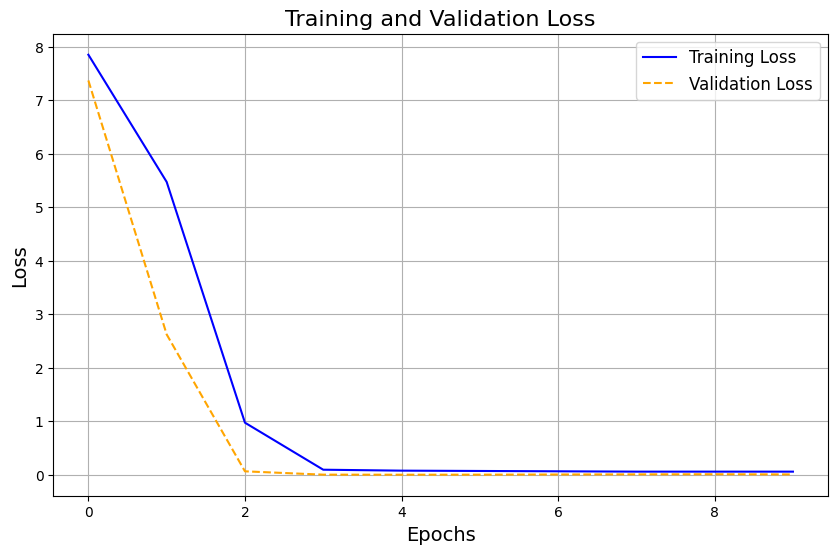

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


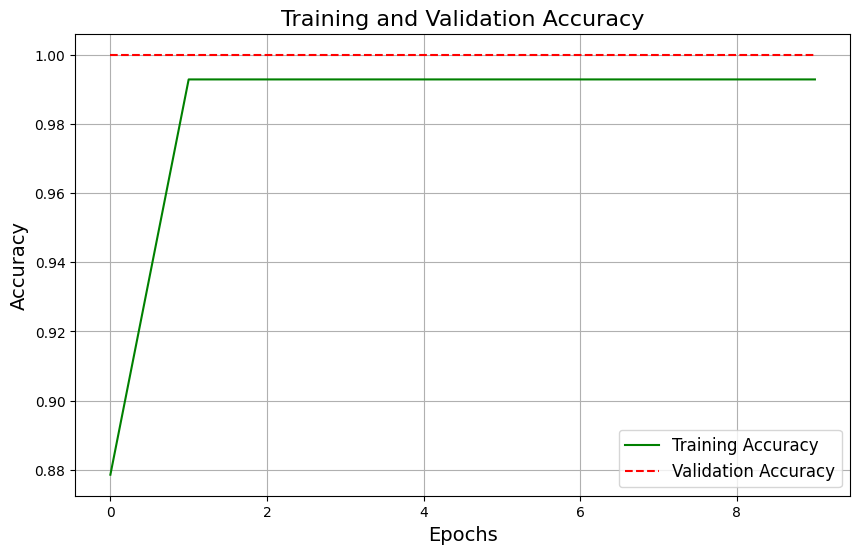

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='--')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Load the dataset (Fita-data.csv) to get the English translations
#df = pd.read_csv('Gita-data.csv')

# Function to translate Sanskrit text to English
def translate_sanskrit(sanskrit_text):

    # Tokenize the input Sanskrit text
    sanskrit_sequence = tokenizer_sanskrit.texts_to_sequences([sanskrit_text])

    # Pad the sequence
    sanskrit_padded = pad_sequences(sanskrit_sequence, maxlen=max_sanskrit_length, padding='post')

    # Predict using the model
    predicted_probs = model.predict(sanskrit_padded)
    predicted_index = np.argmax(predicted_probs[0])  # Get the index of the most likely word

    # Get the corresponding English word from the vocabulary
    if predicted_index in tokenizer_english.index_word:
        predicted_word = tokenizer_english.index_word[predicted_index]
    else:
        predicted_word = "UNK"  # Handle unknown words

    # Find the corresponding English sentence in the dataset
    english_sentence = df[df['Sanskrit'] == sanskrit_text]['English'].values[0]

    return english_sentence  # Return the predicted word


# Get Sanskrit input from the user
sanskrit_input = text_comb

# Translate and print the English output
english_output = translate_sanskrit(sanskrit_input)
print("English translation:", english_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from difflib import SequenceMatcher

# Function to find the closest matching Sanskrit sentence in the dataset
def find_closest_sentence(input_sentence, dataset_sentences):
    highest_ratio = 0
    closest_sentence = None
    for sentence in dataset_sentences:
        ratio = SequenceMatcher(None, input_sentence, sentence).ratio()
        if ratio > highest_ratio:
            highest_ratio = ratio
            closest_sentence = sentence
    return closest_sentence if highest_ratio >= 0.6 else None


In [ ]:
# Function to translate Sanskrit text to English
def translate_sanskrit(sanskrit_text):
    # Tokenize and pad the input Sanskrit text
    sanskrit_sequence = tokenizer_sanskrit.texts_to_sequences([sanskrit_text])
    sanskrit_padded = pad_sequences(sanskrit_sequence, maxlen=max_sanskrit_length, padding='post')

    # Predict using the model
    predicted_probs = model.predict(sanskrit_padded)
    predicted_index = np.argmax(predicted_probs[0])

    # Get the corresponding English word
    predicted_word = tokenizer_english.index_word.get(predicted_index, "UNK")

    # Try exact match first
    matched_rows = df[df['Sanskrit'] == sanskrit_text]

    # If exact match not found, try to find the closest sentence
    if matched_rows.empty:
        closest = find_closest_sentence(sanskrit_text, df['Sanskrit'].tolist())
        if closest:
            english_sentence = df[df['Sanskrit'] == closest]['English'].values[0]
        else:
            english_sentence = "Translation not found."
    else:
        english_sentence = matched_rows['English'].values[0]

    return english_sentence

In [ ]:
# Get Sanskrit input from the extracted image (OCR)
sanskrit_input = text_comb

# Translate and print the English output
english_output = translate_sanskrit(sanskrit_input)
print("English translation:", english_output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
English translation: King Yudhishthir, blew the Anantavijay, while Nakul and Sahadev blew the Sughosh and Manipushpak. The excellent archer and king of Kashi, the great warrior Shikhandi, Dhrishtadyumna, Virat, and the invincible Satyaki, Drupad, the five sons of Draupadi, and the mighty-armed Abhimanyu, son of Subhadra, all blew their respective conch shells, O Ruler of the earth.


In [ ]:
test_loss, test_accuracy = model.evaluate(sanskrit_test, english_test_padded_target)

# Output the test results
print(f"Test Loss: {test_loss:.4f}")  # Showing the loss with 4 decimal points for clarity
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")  # Showing the accuracy as a percentage


NameError: name 'sanskrit_test' is not defined

In [ ]:
!pip install scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

# Get predictions on the test set
y_pred_probs = model.predict(sanskrit_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Calculate precision, recall, and F1 score
precision = precision_score(english_test_padded_target, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(english_test_padded_target, y_pred, average='weighted')
f1 = f1_score(english_test_padded_target, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and print the classification report
report = classification_report(english_test_padded_target, y_pred)
print("\nClassification Report:\n", report)

NameError: name 'sanskrit_test' is not defined

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=907cb278982feca9d2cdcad2a6f93a9158f325855e24c52752d3d012f9c9c715
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

In [ ]:
from googletrans import Translator

# Function to translate Sanskrit text to English
def translate_sanskrit(sanskrit_text):
    """Translates Sanskrit text to English using the Google Translate API."""
    try:
        # Initialize the translator
        translator = Translator()

        # Translate the text from Sanskrit to English
        translated = translator.translate(sanskrit_text, src='auto', dest='en')  # Auto-detect source language
        return translated.text  # Return the translated English text

    except Exception as e:
        print(f"Error in translation: {e}")
        return None

# Example usage
sanskrit_text = text_comb

# Translate Sanskrit to English
english_translation = translate_sanskrit(sanskrit_text)
if english_translation:
    print("English Translation:", english_translation)
else:
    print("Translation failed.")


English Translation: Infinitely victory King = no son of Kunti, Yudhisthira /Nakula and Sahadeva, Sughosha and Manipushpaka.Kasya and the supreme archer and Shikhandi and the great charioteer |Dhri thrishumna Virata and Satyaki / s Draupadis and Draupadis and all the lords of the earth |Drupada Dr


In [ ]:
pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
